In [1]:
## imports
import numpy as np
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt
import nltk

In [2]:
data=pd.read_csv("AirWays_Sentiment_Analysis.csv")

In [16]:
data.head(50)

,tweet_id,airline_sentiment_confidence,airline,name,text,tweet_created,tweet_location,user_timezone,airline_sentiment,sentiment_score
0,5.703061e+17,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,0.0000
1,5.703011e+17,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,0.0000
2,5.703011e+17,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,0.0000
3,5.703010e+17,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5984
4,5.703008e+17,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5829
5,5.703008e+17,1.0000,Virgin America,jnardino,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5945
6,5.703006e+17,0.6745,Virgin America,cjmcginnis,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),NaN,0.6908
7,5.703002e+17,0.6340,Virgin America,pilot,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),NaN,0.1458
8,5.703000e+17,0.6559,Virgin America,dhepburn,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),NaN,-0.3477
9,5.702955e+17,1.0000,Virgin America,YupitsTate,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),NaN,0.7717


In [4]:
tweet=data["text"]

In [5]:
tweet.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [6]:
nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [45]:
docs=tweet.str.lower()
docs.head()
docs=docs.str.replace('[^a-z ]','') # retain all alphabets with #@
docs.head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [46]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

In [47]:
docs_clean.head()

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: text, dtype: object

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
senti=SentimentIntensityAnalyzer()
print(senti.polarity_scores('i love india'))
print(senti.polarity_scores('i LOVE india'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}


In [15]:
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score
def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score <-.25:
        return "negitive"
    else:
        return 'Neutral'
    
    
data['sentiment_score']=data['text'].apply(get_sentiment_score)
data.head()
#

,tweet_id,airline_sentiment_confidence,airline,name,text,tweet_created,tweet_location,user_timezone,airline_sentiment,sentiment_score
0,5.703061e+17,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,0.0000
1,5.703011e+17,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,0.0000
2,5.703011e+17,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,0.0000
3,5.703010e+17,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5984
4,5.703008e+17,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5829


In [18]:
data["sentiment_vader"]=data["sentiment_score"].apply(get_sentiment)

In [19]:
data.head()

,tweet_id,airline_sentiment_confidence,airline,name,text,tweet_created,tweet_location,user_timezone,airline_sentiment,sentiment_score,sentiment_vader
0,5.703061e+17,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,0.0000,Neutral
1,5.703011e+17,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,0.0000,Neutral
2,5.703011e+17,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,0.0000,Neutral
3,5.703010e+17,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5984,negitive
4,5.703008e+17,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5829,negitive


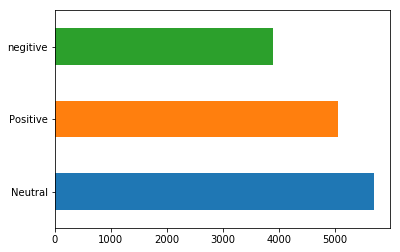

In [20]:
data['sentiment_vader'].value_counts().plot.barh()

In [21]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [22]:
Virgin=data[data.airline=='Virgin America']

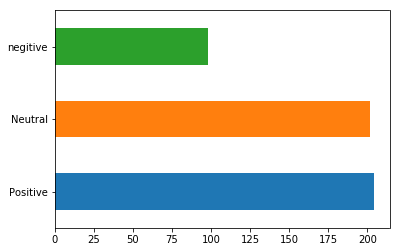

In [23]:
Virgin['sentiment_vader'].value_counts().plot.barh()

In [24]:
United=data[data.airline=='United']

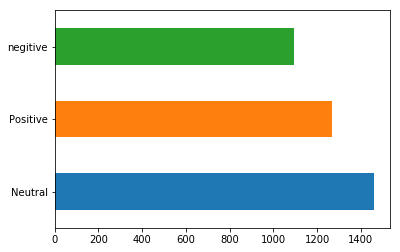

In [25]:
United['sentiment_vader'].value_counts().plot.barh()

In [26]:
Southwest=data[data.airline=='Southwest']

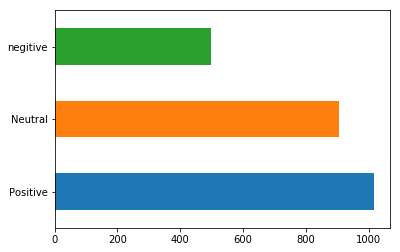

In [27]:
Southwest['sentiment_vader'].value_counts().plot.barh()

In [29]:
Delta=data[data.airline=='Delta']

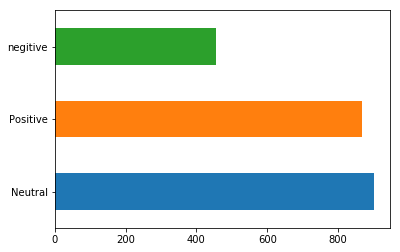

In [31]:
Delta["sentiment_vader"].value_counts().plot(kind='barh')

In [32]:
US=data[data.airline=='US Airways']

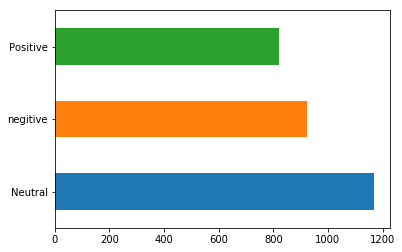

In [33]:
US["sentiment_vader"].value_counts().plot(kind='barh')

In [35]:
American=data[data.airline=='American']

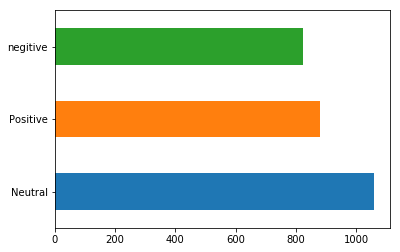

In [36]:
American["sentiment_vader"].value_counts().plot(kind='barh')

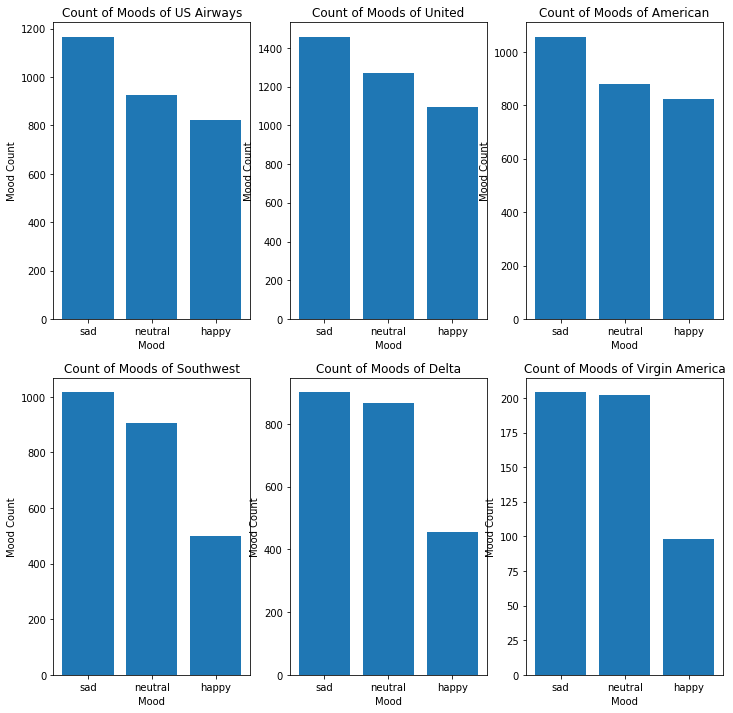

In [73]:
def plot_sub_sentiment(Airline):
    df=data[data['airline']==Airline]
    count=df['sentiment_vader'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['sad','neutral','happy'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [69]:
#3
#import
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))   #since unigram
sparse_martix= cv.fit_transform(docs_clean)
numpy_matrix= sparse_martix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns= cv.get_feature_names())
df_dtm.shape

(14640, 11516)

In [70]:
df_dtm.head()

,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aacustomerservic,aadavantag,aadelay,aadfw,...,zj,zkatcher,zombi,zone,zoom,zrh,zrhairport,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))   #bigram
sparse_martix= cv.fit_transform(docs_clean)
numpy_matrix= sparse_martix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns= cv.get_feature_names())
df_dtm.shape

(14640, 79568)

In [66]:
df_dtm.head()

,aa abl,aa ac,aa account,aa advantag,aa agent,aa air,aa airlin,aa airplan,aa also,aa alway,...,zoom sauc,zoom scroll,zrh depart,zrhairport replac,zuke nonvegan,zurich bc,zurich jfk,zurich would,zurich zrhairport,zurichnew york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
sid = SentimentIntensityAnalyzer()


In [51]:
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

def take(word):
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_list.append(word)
        return(pos_word_list)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_list.append(word)
        return(neg_word_list)
    else:
        neu_word_list.append(word)   
        return(neu_word_list)

In [52]:
data["clean"]=docs_clean

In [53]:
data["senti_word"]=data["clean"].apply(lambda x: take(x))

In [54]:
data.head()

,tweet_id,airline_sentiment_confidence,airline,name,text,tweet_created,tweet_location,user_timezone,airline_sentiment,sentiment_score,sentiment_vader,senti_word,clean
0,5.703061e+17,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,0.0000,Neutral,"[virginamerica dhepburn said, virginamerica pl...",virginamerica dhepburn said
1,5.703011e+17,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,0.0000,Neutral,"[virginamerica dhepburn said, virginamerica pl...",virginamerica plu youv ad commerci experi tacki
2,5.703011e+17,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,0.0000,Neutral,"[virginamerica dhepburn said, virginamerica pl...",virginamerica didnt today must mean need take ...
3,5.703010e+17,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5984,negitive,"[virginamerica dhepburn said, virginamerica pl...",virginamerica realli aggress blast obnoxi ente...
4,5.703008e+17,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,-0.5829,negitive,"[virginamerica realli big bad thing, virginame...",virginamerica realli big bad thing


In [ ]:
#only US airways has many negitive ratings then positive